In [2]:
# Importing libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


In [3]:
data = pd.read_csv("student_scores.csv")

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.shape

(25, 2)

In [9]:
# Used to check whether there is any null values. 
data.dropna(inplace=True)
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

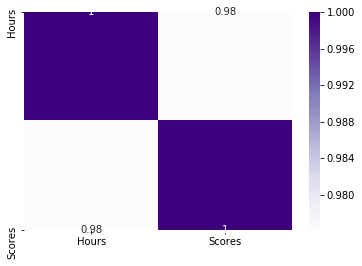

In [14]:
# Observing the relationship between no of hours studied and score percentage using correlation
correlation_matrix = data.corr()
correlation_matrix
sns.heatmap(data=correlation_matrix, cmap="Purples", annot=True)
plt.show()

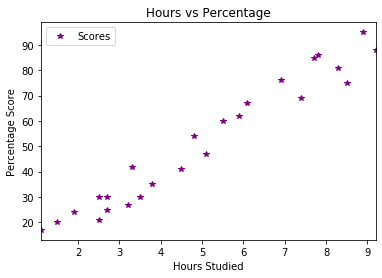

In [24]:
# Plotting
data.plot(x='Hours', y='Scores', style='*',color='purple')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#We can identify a positive linear relationship between scores and hours studied

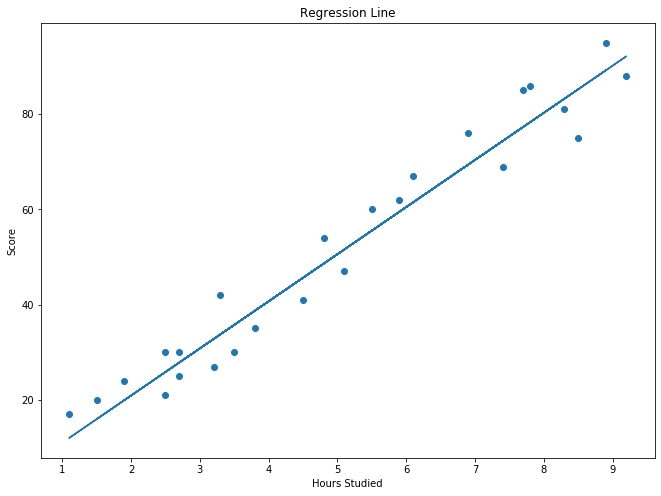

In [20]:
#Assigning the attributes to X and labels to y
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#Splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# Plotting the regression line
regline = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(11,8))
plt.scatter(X, y)
plt.plot(X, regline);
plt.title("Regression Line")
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

In [21]:
#Using model to make predictions
y_pred = regressor.predict(X_test)

prediction = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
prediction

,Actual Scores,Predicted Scores
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


#Testing the model with the value provided in the problem statement

In [22]:
hour = 9.25 #Provided Value
h = np.array(hour) # convert to a numpy array
h= h.reshape(1, -1)
prediction = regressor.predict(h)
print("Number of Hours = {}".format(hour))
print("Predicted Score = {}".format(prediction[0]))

Number of Hours = 9.25
Predicted Score = 92.65537184734602


In [23]:
# MODEL EVALUATION
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mse = (mean_absolute_error(y_test, y_pred))
print("Mean Absolute Error:",mse)

rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Square Error:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

Mean Absolute Error: 4.894510863410609
Root Mean Square Error: 5.102408224327238
R-Square: 0.956640847232559


##Conclusion: From the R-Square value we can identify a 95% accuracy for our prediction model
    